In [288]:
import pandas as pd
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [289]:
conn = sqlite3.connect('zippedData/im.db')

In [290]:
schema_df = pd.read_sql("""

SELECT *
FROM sqlite_master

""", conn)

schema_df

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


In [291]:
pd.read_sql("""

SELECT *
FROM movie_basics b
limit 3

""", conn)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama


In [292]:
pd.read_sql("""

SELECT *
FROM movie_ratings
limit 3

""", conn)

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20


In [293]:
df_imdb = pd.read_sql("""

SELECT b.movie_id
       ,b.primary_title
       ,b.original_title
       ,b.start_year
       ,b.runtime_minutes
       ,b.genres
       ,r.averagerating
       ,r.numvotes
       ,a.region
FROM movie_basics b
join movie_ratings r on r.movie_id = b.movie_id
left join movie_akas a on a.movie_id = b.movie_id

""", conn)

In [294]:
df_imdb.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,region
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,None
1,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,IN
2,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,IN
3,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,IN
4,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,IN


In [295]:
[c.replace("_", "").strip() for c in df_imdb.columns]

['movieid',
 'primarytitle',
 'originaltitle',
 'startyear',
 'runtimeminutes',
 'genres',
 'averagerating',
 'numvotes',
 'region']

In [296]:
df_imdb = df_imdb.rename(columns = dict(zip(df_imdb.columns, [c.replace("_", "").strip() for c in df_imdb.columns])))

In [297]:
df_imdb.head()

,movieid,primarytitle,originaltitle,startyear,runtimeminutes,genres,averagerating,numvotes,region
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,None
1,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,IN
2,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,IN
3,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,IN
4,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,IN


In [298]:
df_imdb.describe(include=object)

,movieid,primarytitle,originaltitle,genres,region
count,266085,266085,266085,264736,218341
unique,73856,69993,71097,923,196
top,tt2488496,Frozen,Frozen,Drama,US
freq,61,81,77,36126,30194


In [299]:
df_imdb[df_imdb.primarytitle=='The Return']

,movieid,primarytitle,originaltitle,startyear,runtimeminutes,genres,averagerating,numvotes,region
65752,tt1848871,The Return,El regreso,2012,102.0,Drama,7.2,233,None
65753,tt1848871,The Return,El regreso,2012,102.0,Drama,7.2,233,CA
65754,tt1848871,The Return,El regreso,2012,102.0,Drama,7.2,233,CR
65755,tt1848871,The Return,El regreso,2012,102.0,Drama,7.2,233,US
119760,tt2578550,The Return,El Regreso,2012,69.0,Drama,6.0,6,None
119761,tt2578550,The Return,El Regreso,2012,69.0,Drama,6.0,6,BR
119762,tt2578550,The Return,El Regreso,2012,69.0,Drama,6.0,6,FR
119763,tt2578550,The Return,El Regreso,2012,69.0,Drama,6.0,6,US
175168,tt4093816,The Return,The Return,2015,92.0,"Crime,Mystery,Thriller",6.3,36,GB
187093,tt4523246,The Return,The Return,2015,55.0,"Horror,Mystery,Thriller",5.4,27,US


In [300]:
df_imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266085 entries, 0 to 266084
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   movieid         266085 non-null  object 
 1   primarytitle    266085 non-null  object 
 2   originaltitle   266085 non-null  object 
 3   startyear       266085 non-null  int64  
 4   runtimeminutes  253959 non-null  float64
 5   genres          264736 non-null  object 
 6   averagerating   266085 non-null  float64
 7   numvotes        266085 non-null  int64  
 8   region          218341 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 18.3+ MB


In [301]:
df_mg = pd.read_csv('zippedData/bom.movie_gross.csv.gz')

In [302]:
df_mg = df_mg.rename(columns = dict(zip(df_mg.columns, [c.replace("_", "").strip() for c in df_mg.columns])))

In [303]:
df_mg.head()

,title,studio,domesticgross,foreigngross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [304]:
df_mg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title          3387 non-null   object 
 1   studio         3382 non-null   object 
 2   domesticgross  3359 non-null   float64
 3   foreigngross   2037 non-null   object 
 4   year           3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [305]:
df_mg[['primarytitle', 'startyear']] = df_mg[['title', 'year']]

In [306]:
df_mg.head()

,title,studio,domesticgross,foreigngross,year,primarytitle,startyear
0,Toy Story 3,BV,415000000.0,652000000,2010,Toy Story 3,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010,Alice in Wonderland (2010),2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010,Harry Potter and the Deathly Hallows Part 1,2010
3,Inception,WB,292600000.0,535700000,2010,Inception,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010,Shrek Forever After,2010


In [307]:
df_clean = df_imdb

In [308]:
df_clean.head()

,movieid,primarytitle,originaltitle,startyear,runtimeminutes,genres,averagerating,numvotes,region
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,None
1,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,IN
2,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,IN
3,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,IN
4,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,IN


In [309]:
# combine the two datasets
df_clean = pd.merge(df_clean, df_mg, how='left', on=['primarytitle','startyear'])

In [310]:
df_clean.head()

,movieid,primarytitle,originaltitle,startyear,runtimeminutes,genres,averagerating,numvotes,region,title,studio,domesticgross,foreigngross,year
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,None,NaN,NaN,NaN,NaN,NaN
1,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,IN,NaN,NaN,NaN,NaN,NaN
2,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,IN,NaN,NaN,NaN,NaN,NaN
3,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,IN,NaN,NaN,NaN,NaN,NaN
4,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,IN,NaN,NaN,NaN,NaN,NaN


In [311]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 266085 entries, 0 to 266084
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   movieid         266085 non-null  object 
 1   primarytitle    266085 non-null  object 
 2   originaltitle   266085 non-null  object 
 3   startyear       266085 non-null  int64  
 4   runtimeminutes  253959 non-null  float64
 5   genres          264736 non-null  object 
 6   averagerating   266085 non-null  float64
 7   numvotes        266085 non-null  int64  
 8   region          218341 non-null  object 
 9   title           39820 non-null   object 
 10  studio          39809 non-null   object 
 11  domesticgross   39710 non-null   float64
 12  foreigngross    33074 non-null   object 
 13  year            39820 non-null   float64
dtypes: float64(4), int64(2), object(8)
memory usage: 30.5+ MB


In [312]:
df_clean['genres'].str.rsplit(",", expand=True)

,0,1,2
0,Action,Crime,Drama
1,Action,Crime,Drama
2,Action,Crime,Drama
3,Action,Crime,Drama
4,Action,Crime,Drama
...,...,...,...
266080,Documentary,None,None
266081,Drama,Family,None
266082,Documentary,None,None
266083,None,None,None


In [313]:
df_clean[['genre_1', 'genre_2', 'genre_3']] = df_clean['genres'].str.rsplit(",", expand=True)
df_clean.head()

,movieid,primarytitle,originaltitle,startyear,runtimeminutes,genres,averagerating,numvotes,region,title,studio,domesticgross,foreigngross,year,genre_1,genre_2,genre_3
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,None,NaN,NaN,NaN,NaN,NaN,Action,Crime,Drama
1,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,IN,NaN,NaN,NaN,NaN,NaN,Action,Crime,Drama
2,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,IN,NaN,NaN,NaN,NaN,NaN,Action,Crime,Drama
3,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,IN,NaN,NaN,NaN,NaN,NaN,Action,Crime,Drama
4,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,IN,NaN,NaN,NaN,NaN,NaN,Action,Crime,Drama


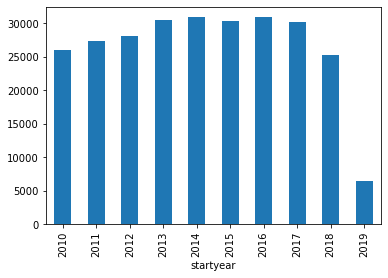

In [314]:
df_clean.groupby('startyear')['movieid'].count().plot.bar();

In [315]:
df_clean['domesticgross'] = df_clean['domesticgross'].apply(pd.to_numeric, errors = 'coerce').dropna().astype(float)
df_clean['foreigngross'] = df_clean['foreigngross'].apply(pd.to_numeric, errors = 'coerce').dropna().astype(float)

df_clean['total_gross'] = df_clean['domesticgross'] + df_clean['foreigngross']

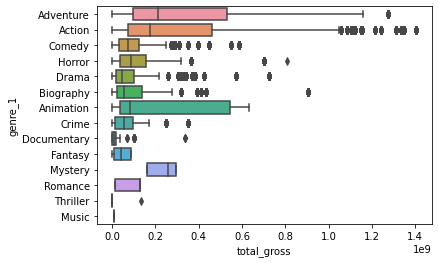

In [316]:
has_rev_filter = df_clean['total_gross'].notnull()
sns.boxplot(data=df_clean[has_rev_filter], x='total_gross', y='genre_1' );

In [317]:
temp_1 = df_clean[has_rev_filter][['total_gross','genre_1']]
temp_2 = df_clean[has_rev_filter][['total_gross','genre_2']]
temp_3 = df_clean[has_rev_filter][['total_gross','genre_3']]

temp_1.rename(columns={"genre_1": "genre"}, inplace=True)
temp_2.rename(columns={"genre_2": "genre"}, inplace=True)
temp_3.rename(columns={"genre_3": "genre"}, inplace=True)

genre_revenue = temp_1.append(temp_2).append(temp_3).dropna()
genre_revenue.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86633 entries, 151 to 257150
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   total_gross  86633 non-null  float64
 1   genre        86633 non-null  object 
dtypes: float64(1), object(1)
memory usage: 2.0+ MB


In [318]:
genre_revenue['genre'].value_counts()

Drama          14564
Comedy         12341
Action         11057
Adventure      10541
Thriller        5604
Crime           4698
Romance         4370
Animation       3419
Sci-Fi          3120
Biography       3027
Fantasy         3019
Horror          2899
Mystery         2679
Family          1997
History         1124
Music            781
Sport            468
Documentary      433
War              185
Western          182
Musical          125
Name: genre, dtype: int64

In [319]:
genre_revenue.groupby('genre').describe()

total_gross                                                      \
                  count          mean           std        min          25%   
genre                                                                         
Action          11057.0  3.083122e+08  3.150405e+08   369500.0   71700000.0   
Adventure       10541.0  4.027183e+08  3.377442e+08   624000.0  125700000.0   
Animation        3419.0  4.225111e+08  3.225622e+08  1301500.0  147500000.0   
Biography        3027.0  1.104263e+08  1.446904e+08   608000.0   22200000.0   
Comedy          12341.0  1.932018e+08  2.391167e+08   104500.0   45200000.0   
Crime            4698.0  1.071980e+08  1.270915e+08    55600.0   29600000.0   
Documentary       433.0  1.645040e+07  3.356395e+07    49400.0    1828000.0   
Drama           14564.0  1.061725e+08  1.363154e+08    55100.0   20600000.0   
Family           1997.0  2.122668e+08  2.133160e+08   832300.0   60237000.0   
Fantasy          3019.0  3.089397e+08  3.314646e+08   346700.0   74700000.0   
History          1124.0  1.136424e+08  1.201245e+08   276300.0   16000000.0   
Horror           2899.0  1.213198e+08  1.306856e+08   369500.0   37600000.0   
Music             781.0  1.259576e+08  1.980257e+08   569000.0   20300000.0   
Musical           125.0  2.260531e+08  1.796738e+08   193300.0   59400000.0   
Mystery          2679.0  1.273519e+08  1.263865e+08   293100.0   33200000.0   
Romance          4370.0  8.582203e+07  9.346194e+07   104500.0   25300000.0   
Sci-Fi           3120.0  4.241895e+08  3.619745e+08  1756000.0  127200000.0   
Sport             468.0  7.504610e+07  6.166516e+07  1701700.0   23100000.0   
Thriller         5604.0  1.747800e+08  2.202767e+08    55100.0   37600000.0   
War               185.0  7.024124e+07  6.806784e+07   228000.0    3800000.0   
Western           182.0  2.061195e+08  1.498256e+08   321100.0   87200000.0   

                                                     
                     50%          75%           max  
genre                                                
Action       176600000.0  463400000.0  1.405400e+09  
Adventure    300200000.0  643400000.0  1.405400e+09  
Animation    347500000.0  591800000.0  1.276400e+09  
Biography     59900000.0  140300000.0  9.036000e+08  
Comedy       105000000.0  235600000.0  1.276400e+09  
Crime         68900000.0  154000000.0  7.887000e+08  
Documentary    5400000.0   20300000.0  3.349000e+08  
Drama         60237000.0  134975000.0  9.036000e+08  
Family       132700000.0  299400000.0  1.021100e+09  
Fantasy      151100000.0  449300000.0  1.332600e+09  
History       67400000.0  177600000.0  5.252000e+08  
Horror        85400000.0  142800000.0  8.071000e+08  
Music         73300000.0  115300000.0  9.036000e+08  
Musical       89500000.0  395000000.0  4.350000e+08  
Mystery       85400000.0  167800000.0  5.868000e+08  
Romance       56400000.0  117100000.0  5.710000e+08  
Sci-Fi       348300000.0  668000000.0  1.405400e+09  
Sport         49000000.0  110200000.0  2.140000e+08  
Thriller      88700000.0  218400000.0  1.108600e+09  
War           76600000.0  115000000.0  1.776000e+08  
Western      252200000.0  260500000.0  4.254000e+08

In [320]:
data = genre_revenue.groupby('genre').mean().reset_index().sort_values(by='total_gross', ascending=False)
data.head()

,genre,total_gross
16,Sci-Fi,4.241895e+08
2,Animation,4.225111e+08
1,Adventure,4.027183e+08
9,Fantasy,3.089397e+08
0,Action,3.083122e+08


In [321]:
genre_revenue.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86633 entries, 151 to 257150
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   total_gross  86633 non-null  float64
 1   genre        86633 non-null  object 
dtypes: float64(1), object(1)
memory usage: 2.0+ MB


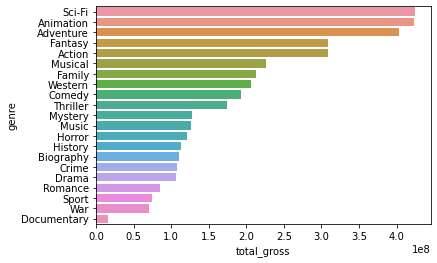

In [322]:
sns.barplot(data=data, x='total_gross', y='genre');

In [323]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

print(pairwise_tukeyhsd(genre_revenue['total_gross'], genre_revenue['genre']))

                 Multiple Comparison of Means - Tukey HSD, FWER=0.05                 
   group1      group2       meandiff    p-adj       lower           upper      reject
-------------------------------------------------------------------------------------
     Action   Adventure   94406155.3921  0.001   82659772.2857  106152538.4984   True
     Action   Animation  114198932.9169  0.001   97313467.4775  131084398.3564   True
     Action   Biography -197885920.5394  0.001  -215586810.292 -180185030.7868   True
     Action      Comedy -115110417.8549  0.001 -126409742.6273 -103811093.0826   True
     Action       Crime -201114141.1632  0.001   -216141788.58 -186086493.7464   True
     Action Documentary -291861791.5229  0.001  -334133944.306 -249589638.7398   True
     Action       Drama -202139677.3358  0.001 -213023864.5311 -191255490.1405   True
     Action      Family  -96045436.6471  0.001 -117026189.6563  -75064683.6379   True
     Action     Fantasy     627533.2353    0.9  -17091

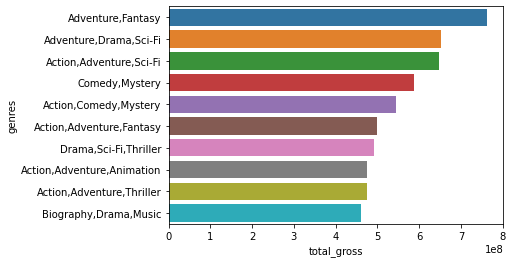

In [324]:
data = df_clean.groupby('genres')['total_gross'].mean().reset_index().nlargest(n=10, columns='total_gross')

sns.barplot(data=data, x='total_gross', y='genres');

In [325]:
top_genres_filter = df_clean['genres'].isin(data['genres'])
print(pairwise_tukeyhsd(df_clean[has_rev_filter & top_genres_filter]['total_gross'], df_clean[has_rev_filter & top_genres_filter]['genres']))

                               Multiple Comparison of Means - Tukey HSD, FWER=0.05                                
          group1                     group2              meandiff    p-adj       lower           upper      reject
------------------------------------------------------------------------------------------------------------------
Action,Adventure,Animation  Action,Adventure,Fantasy   24239411.0874    0.9  -35086658.3698   83565480.5447  False
Action,Adventure,Animation   Action,Adventure,Sci-Fi  172891795.5246  0.001  117417539.3265  228366051.7227   True
Action,Adventure,Animation Action,Adventure,Thriller    -697136.1596    0.9  -70149143.7531   68754871.4339  False
Action,Adventure,Animation     Action,Comedy,Mystery    68707554.672    0.9 -316862724.1692  454277833.5132  False
Action,Adventure,Animation    Adventure,Drama,Sci-Fi  176490449.4088 0.0012   43331432.9587  309649465.8589   True
Action,Adventure,Animation         Adventure,Fantasy  287704634.6209  0.001  183

In [326]:
def best_line(X, Y):
    """This function plots the best-fit line for a group of datapoints broken into
    a set of independent variable values (X) and a set of dependent variable values (Y)"""
    import numpy as np
    from matplotlib import pyplot as plt
    
    X_bar = np.mean(X)
    Y_bar = np.mean(Y)
    
    X_diffs = np.asarray([i - X_bar for i in X])
    Y_diffs = np.asarray([i - Y_bar for i in Y])
    
    num = X_diffs.dot(Y_diffs)
    
    denom = np.sqrt((X_diffs ** 2).sum() * (Y_diffs ** 2).sum())
    
    r_pearson = num / denom
    
    beta_1 = r_pearson * Y_diffs.std() / X_diffs.std()
    
    beta_0 = Y_bar - beta_1 * X_bar
    
    Xs = np.linspace(np.min(X), np.max(X), 100)
    Ys = beta_1 * Xs + beta_0
    
    fig, ax = plt.subplots()
    ax.plot(X, Y, 'ro', label='datapoints')
    ax.plot(Xs, Ys, 'k', label=f'y={round(beta_1, 2)}x+{round(beta_0, 2)}')
    plt.legend()
    plt.show();

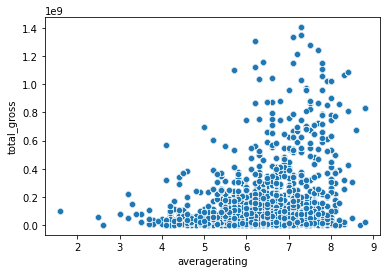

In [327]:
sns.scatterplot(data=df_clean[has_rev_filter], x='averagerating', y='total_gross' );

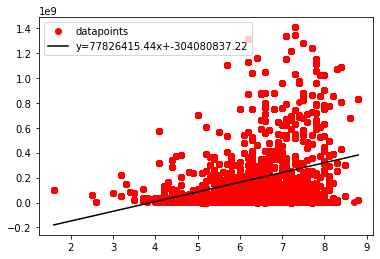

In [328]:
best_line(df_clean[has_rev_filter]['averagerating'], df_clean[has_rev_filter]['total_gross'])

In [329]:
import statsmodels.api as sm
endog = df_clean[has_rev_filter]['total_gross']
exog = sm.add_constant(df_clean[has_rev_filter]['averagerating'])
lin_reg_model = sm.OLS(endog, exog)

In [330]:
import numpy as np
x = df_clean[has_rev_filter]['total_gross']
y = df_clean[has_rev_filter]['averagerating']
coer_data = np.corrcoef(x, y)
coer_data[0,1]

0.2801878629342171

In [331]:
lin_reg_model.fit()

In [332]:
lin_reg_model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            total_gross   R-squared:                       0.079
Model:                            OLS   Adj. R-squared:                  0.078
Method:                 Least Squares   F-statistic:                     2792.
Date:                Tue, 09 May 2023   Prob (F-statistic):               0.00
Time:                        13:18:53   Log-Likelihood:            -6.8026e+05
No. Observations:               32775   AIC:                         1.361e+06
Df Residuals:                   32773   BIC:                         1.361e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -3.041e+08   9.73e+06    -31.254      0.000   -3.23e+08   -2.85e+08
averagerating  7.783e+07   1.47e+06     52.840      0.000    7.49e+07    8.07e+07
==============================================================================
Omnibus:                    11624.235   Durbin-Watson:                   0.056
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            37464.997
Skew:                           1.847   Prob(JB):                         0.00
Kurtosis:                       6.714   Cond. No.                         47.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:>

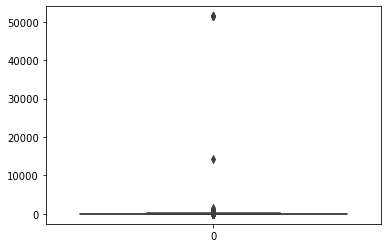

In [373]:
sns.boxplot(data=df_clean['runtimeminutes'])

In [334]:
def film_categorization(runtime):
    movie_category = ''
    if runtime < 40:
        movie_category =  'Short Film'
    elif runtime < 96:
        movie_category =  'Normal Film (short)'
    elif (runtime >= 96) and (runtime <= 120):
        movie_category =  'Normal Film (optimal)'
    elif (runtime > 120):
        movie_category =  'Normal Film (long)'
    else:
        movie_category =  'No Runtime'
    return movie_category

In [335]:
df_clean['runtimecategory'] = df_clean['runtimeminutes'].apply(film_categorization)
df_clean['runtimecategory'].value_counts()

Normal Film (short)      122257
Normal Film (optimal)     98905
Normal Film (long)        32410
No Runtime                12126
Short Film                  387
Name: runtimecategory, dtype: int64

<AxesSubplot:xlabel='runtimecategory', ylabel='total_gross'>

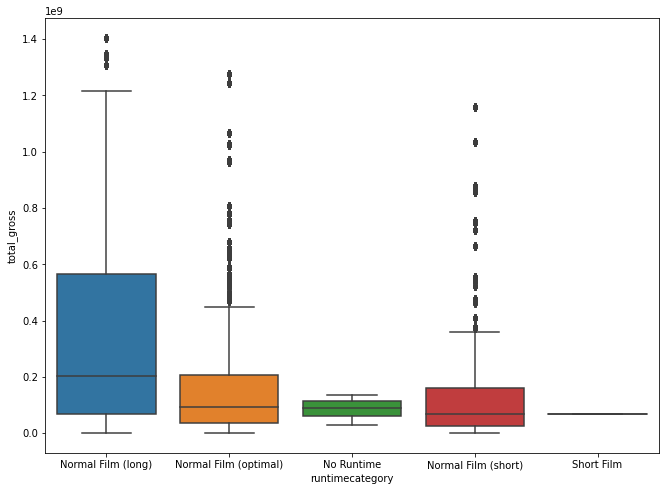

In [336]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(11,8))
sns.boxplot(x=df_clean["runtimecategory"], y=df_clean["total_gross"])

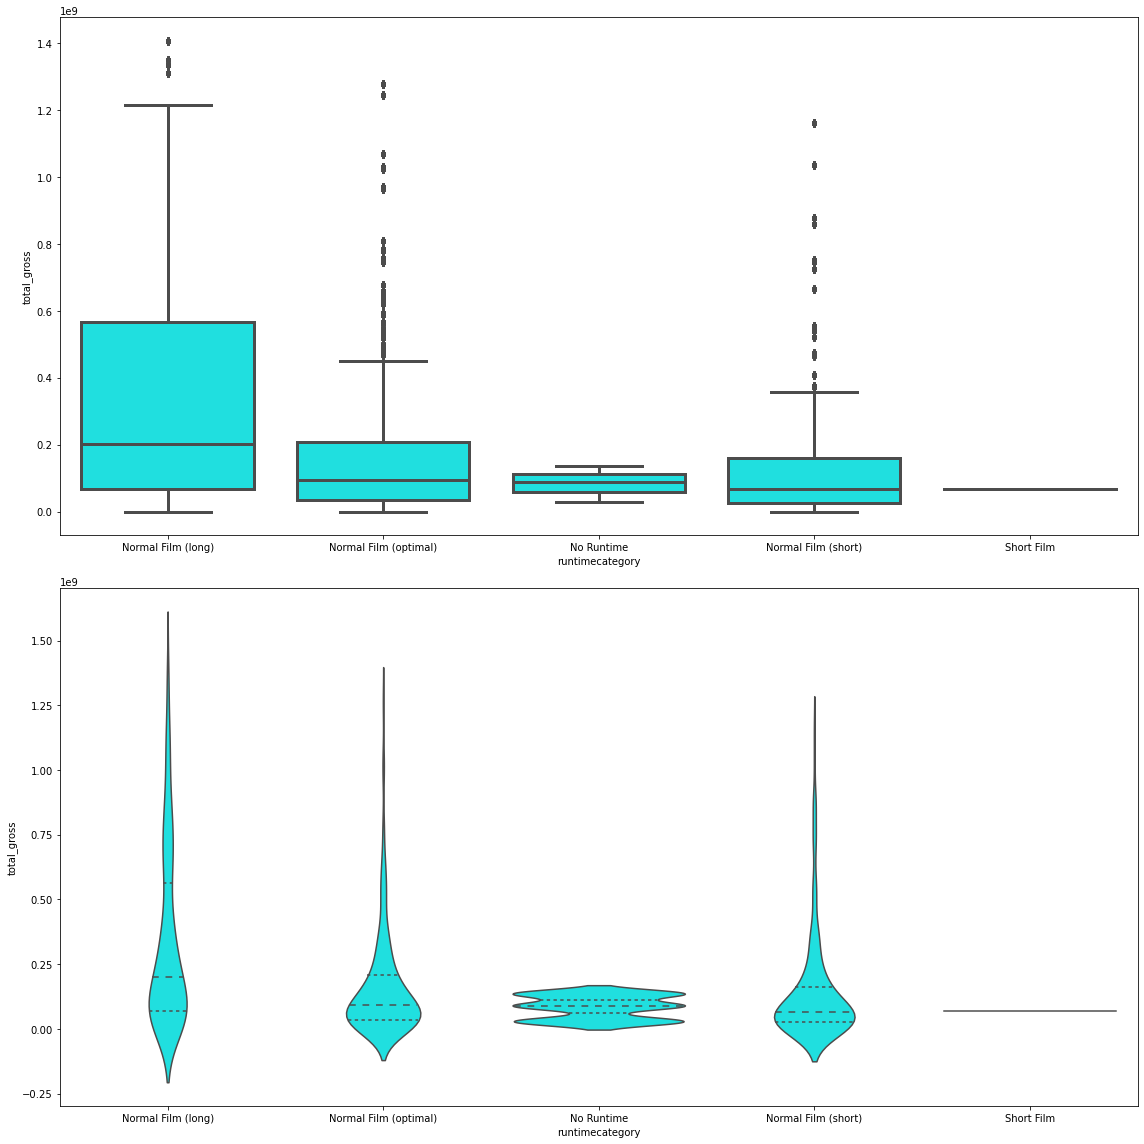

In [337]:
fig, (ax0,ax1) = plt.subplots(nrows=2, figsize=(16, 16))

sns.boxplot(
    x="runtimecategory",
    y="total_gross",
    data=df_clean,
    ax=ax0,
    color='aqua', 
    linewidth=3
)



sns.violinplot(
    x="runtimecategory",
    y="total_gross",
    data=df_clean,
    ax=ax1,
    color='aqua',
    inner="quartile",  # Seeing the mean and quartiles
    bw=.3              # How much smoothing do we use
)

plt.tight_layout();

In [338]:
gross_filter = df_clean['total_gross'].notna()
print(pairwise_tukeyhsd(df_clean[gross_filter]['total_gross'], df_clean[gross_filter]['runtimecategory']))

                          Multiple Comparison of Means - Tukey HSD, FWER=0.05                           
        group1                group2            meandiff    p-adj       lower          upper      reject
--------------------------------------------------------------------------------------------------------
           No Runtime    Normal Film (long)  251552612.6911 0.4014 -139338842.5739 642444067.9561  False
           No Runtime Normal Film (optimal)   77460754.5697    0.9 -313395955.6296 468317464.7689  False
           No Runtime   Normal Film (short)   62039665.7403    0.9 -328869546.9241 452948878.4048  False
           No Runtime            Short Film  -16466666.3333    0.9 -569173887.1966 536240554.5299  False
   Normal Film (long) Normal Film (optimal) -174091858.1214  0.001 -183026381.7568 -165157334.486   True
   Normal Film (long)   Normal Film (short) -189512946.9507  0.001 -200507052.2235 -178518841.678   True
   Normal Film (long)            Short Film -268019279.

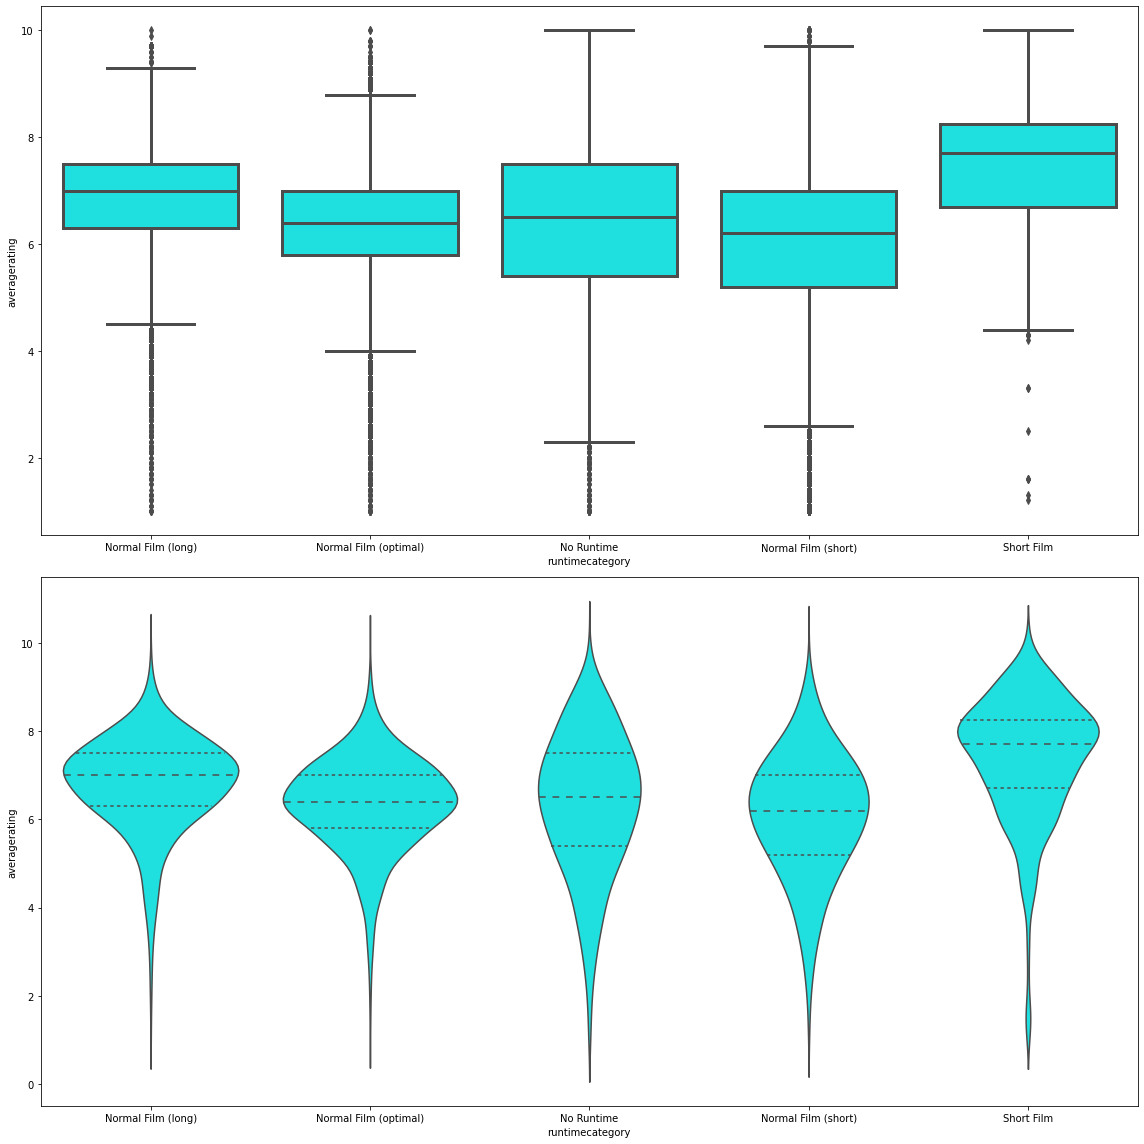

In [339]:
fig, (ax0,ax1) = plt.subplots(nrows=2, figsize=(16, 16))

sns.boxplot(
    x="runtimecategory",
    y="averagerating",
    data=df_clean,
    ax=ax0,
    color='aqua', 
    linewidth=3
)



sns.violinplot(
    x="runtimecategory",
    y="averagerating",
    data=df_clean,
    ax=ax1,
    color='aqua',
    inner="quartile",  # Seeing the mean and quartiles
    bw=.3              # How much smoothing do we use
)

plt.tight_layout();

In [340]:
rating_filter = df_clean['averagerating'].notna()
print(pairwise_tukeyhsd(df_clean[gross_filter]['averagerating'], df_clean[gross_filter]['runtimecategory']))

               Multiple Comparison of Means - Tukey HSD, FWER=0.05                
        group1                group2        meandiff p-adj   lower   upper  reject
----------------------------------------------------------------------------------
           No Runtime    Normal Film (long)    0.196    0.9 -1.1647  1.5567  False
           No Runtime Normal Film (optimal)  -0.3111    0.9 -1.6717  1.0495  False
           No Runtime   Normal Film (short)  -0.8706 0.4077 -2.2313  0.4902  False
           No Runtime            Short Film   1.0667 0.5471 -0.8573  2.9907  False
   Normal Film (long) Normal Film (optimal)  -0.5072  0.001 -0.5383 -0.4761   True
   Normal Film (long)   Normal Film (short)  -1.0666  0.001 -1.1049 -1.0283   True
   Normal Film (long)            Short Film   0.8706 0.4076 -0.4901  2.2314  False
Normal Film (optimal)   Normal Film (short)  -0.5594  0.001 -0.5931 -0.5257   True
Normal Film (optimal)            Short Film   1.3778 0.0455  0.0172  2.7384   True
  No

In [365]:
mcount_filter = df_clean['region'].isin(list(df_clean['region'].value_counts().nlargest(20).index))
mcount_filter.sum()

160238

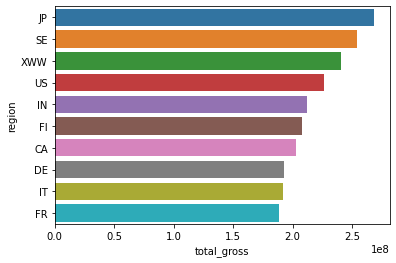

In [368]:
data = df_clean[mcount_filter & mcount_filter].groupby('region')['total_gross'].mean().reset_index().nlargest(n=10, columns='total_gross')
sns.barplot(data=data, x='total_gross', y='region');